## Hill Climbing Implementation

I implemented random-restart hill climbing algorithm in this project.

#### Importing required libraries

In [1]:
import gzip
import csv
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

`readData` method has variants because, files collected from the site has different ways of representing coordinates. Thus i implemented two variants for two different files. This method can be changed a bit accordingly but the flow of reading is same.

In [ ]:
'''def readData(filename):
    
    data = []
    with gzip.open(filename, 'rt') as f:

        tsv_reader = csv.reader(f, delimiter="\t")
        row = next(tsv_reader)
        
        while(row != ['EOF']):
            if row[0][0].isdigit():
                node_num, x_cord, y_cord = row[0].split(" ")
                data.append([float(x_cord), float(y_cord)])
            row = next(tsv_reader)
            
    data = np.array(data)
    
    return data'''

In [2]:
def readData(filename):
    
    data = []
    with gzip.open(filename, 'rt') as f:

        tsv_reader = csv.reader(f, delimiter="\t")
        row = next(tsv_reader)
        
        while(row != ['EOF']):
            if row[0][0].isdigit():
                elements = row[0].split(" ")
                final = []
                for ele in elements:
                    if ele != '':
                        final.append(ele)

                data.append([float(final[1]), float(final[2])])
            row = next(tsv_reader)
            
    data = np.array(data)
    
    return data

`length_of_tour` method takes tour and the distance matrix as input and returns the total length of tour.

In [3]:
def length_of_tour(Initial_tour, distance):
    round_tour = Initial_tour[1:]
    round_tour.append(Initial_tour[0])
    total_distance = 0
    for i, j in zip(Initial_tour, round_tour):
        total_distance += distance[i][j]
        
    return total_distance

`opt_2` takes a tour as input and returns the transformed tour by switching any two adjacent cities.<br>
`shuffle` method re-orders the cities in a tour so that opt_2 can be optimized

In [4]:
def shuffle(length):
    tour1 = list(range(length))
    random.shuffle(tour1)
    tour2 = list(range(length))
    random.shuffle(tour2)
    
    for i in tour1:
        for j in tour2:
            yield (i, j)
    
    
def opt_2(tour):
    for i, j in shuffle(len(tour)):
        if i != j:
            next_tour = tour[:]
            if i < j:
                next_tour[i:(i+j)] = reversed(tour[i:(i+j)])
            else:
                next_tour[i+1:] = reversed(tour[:j])
                next_tour[:j] = reversed(tour[i+1:])
            if next_tour != tour:
                yield next_tour

In [5]:
def basic_hill_climbing(Initial_tour, iterations, distance):
    global all_Tours 
    global all_tour_distances 
    
    seed = 33
    curr_iter = 1
    random.seed(seed)
    random.shuffle(Initial_tour)
    best_tour = Initial_tour
    Initial_tour_distance = length_of_tour(Initial_tour, distance)
    min_distance = Initial_tour_distance
    
    all_Tours.append(best_tour)
    all_tour_distances.append(min_distance)
        
    while curr_iter < iterations:
        found_best = False
        
        for next_tour in opt_2(best_tour):
            if curr_iter >= iterations:
                break
            curr_iter += 1
            next_tour_distance = length_of_tour(next_tour, distance)
            
            if min_distance > next_tour_distance:
                best_tour = next_tour
                min_distance = next_tour_distance
                found_best = True
                all_Tours.append(best_tour)
                all_tour_distances.append(min_distance)
                break
                
        if not found_best:
            break
            
    return curr_iter, min_distance, best_tour

In [6]:
def randomRestart():
    
    #filename             = 'data/att532.tsp.gz'
    #filename             = 'data/pla33810.tsp.gz'
    filename             = 'data/eil76.tsp.gz'
    data                 = readData(filename)
    
    start_time = time.time()
    
    data_transpose       = data[:, np.newaxis]
    difference           = np.square(data_transpose - data)
    distance             = np.sqrt(difference.sum(axis=2))
    
    length = len(data)
    Initial_tour          = list(range(length))
    
    best_tour = None
    min_tour_distance = 0
    rounds = 1000000
    current_round = 0
    global all_Tours 
    global all_tour_distances 
    all_Tours = []
    all_tour_distances = []
    
    while current_round < rounds:
        returned_round, min_distance, tour = basic_hill_climbing(Initial_tour, rounds-current_round, distance)
        
        current_round += returned_round
        if min_tour_distance > min_distance or best_tour is None:
            min_tour_distance = min_distance
            best_tour = tour
            
        
    print("Execution time:  %s seconds ---" % (time.time() - start_time))
    print("Distance of Best Tour found: ", all_tour_distances[-1])
    print("Plot for rounds: %d" %(rounds))
    plt.plot([i for i in range(len(all_tour_distances))], all_tour_distances)
    line_init = plt.axhline(y=all_tour_distances[0], color='r', linestyle='--')
    line_min = plt.axhline(y=min_tour_distance, color='g', linestyle='--')
    x = [i for i in range(len(all_tour_distances))]
    plt.legend([line_init, line_min], ['Initial_tour_distance', 'Optimized_tour_distance'])
    plt.text(x[len(x)//2], max(all_tour_distances), 'min cost: {} KM'.format(round(all_tour_distances[-1])), ha='right', va='top')
    plt.title("Hill Climbing")
    plt.ylabel('Tour_length')
    plt.xlabel('Number of Rounds')
    
    plt.show()
    
    return all_tour_distances, data, all_Tours

Execution time:  38.375062227249146 seconds ---
Distance of Best Tour found:  1104.7917935205962
Plot for rounds: 1000000


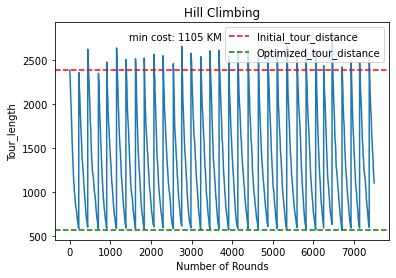

In [7]:
all_tour_distances, data, all_Tours = randomRestart()

I acknowledge that the visualize method is borrowed from this [site](https://github.com/jedrazb/python-tsp-simulated-annealing), but changed as required.

In [8]:
def visualize(history, points):
    
    key_frames_mult = len(history) // 100

    fig, ax = plt.subplots()
    line, = plt.plot([], [], lw=2)

    def init():
        x = [points[i][0] for i in history[0]]
        y = [points[i][1] for i in history[0]]
        plt.plot(x, y, 'co')
        extra_x = (max(x) - min(x)) * 0.05
        extra_y = (max(y) - min(y)) * 0.05
        ax.set_xlim(min(x) - extra_x, max(x) + extra_x)
        ax.set_ylim(min(y) - extra_y, max(y) + extra_y)
        ax.set_title("Visualization of tour for Hill Climbing")
        line.set_data([], [])
        return line,

    def update(frame):
        x = [points[i, 0] for i in history[frame] + [history[frame][0]]]
        y = [points[i, 1] for i in history[frame] + [history[frame][0]]]
        
        line.set_data(x, y)
        return line

    anim = FuncAnimation(fig, update, frames=range(0, len(history), key_frames_mult),
                        init_func=init, interval=30, repeat=False)
    
    anim.save('file.png', fps=10)
    plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


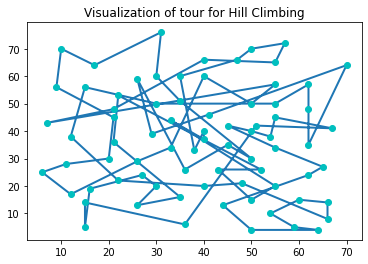

In [9]:
visualize(all_Tours, data)